### CASA0002_Urban simulation
# London tube network analysis
---

Elsa Arcaute, Carlos Molinero, Valentina Marin, Mateo Neira 

February 2023


This code will enable you to convert the tube network into a graph and then we will compute some measures of centrality.

In [711]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter

## 1. Constructing the networks

We are going to use the tube network file called "london_tubenetwork.graphml". This file has everything we need to construct the graph. A __graphml__ is a format that describes the structural properties of a graph. 

In [959]:
#OK, let us start with the graphml file for London's underground

G = nx.read_graphml('london_tubenetwork.graphml')

In [960]:
type(G)

networkx.classes.graph.Graph

In [961]:
# list all operations, methods, attributes of the G object
print(len(dir(G)))
for i in np.random.randint(0, len(dir(G)), 10):
    print(dir(G)[i])

78
adjlist_outer_dict_factory
is_multigraph
adj
__le__
_adj
graph
__doc__
remove_edge
name
__doc__


In [962]:
print(G.number_of_nodes())
print(G.number_of_edges())

438
486


In [963]:
# compute the density of the spatial network
print(G.is_directed()) 
print(G.number_of_edges() / ((G.number_of_nodes() * (G.number_of_nodes() - 1)) / 2))
print(nx.density(G))

False
0.005078210714397667
0.005078210714397667


In [964]:
# To check node attributes:
list(G.nodes(data = True))[0]

('910GCAMHTH',
 {'station_name': 'Cambridge Heath',
  'lines': 'London Overground',
  'coords': '(534825.0140298002, 183290.813466997)'})

In [965]:
# since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])
    

In [966]:
# To check node attributes:
list(G.nodes(data = True))[0]

('910GCAMHTH',
 {'station_name': 'Cambridge Heath',
  'lines': 'London Overground',
  'coords': (534825.0140298002, 183290.813466997)})

In [967]:
# To check edges attributes:
list(G.edges(data = True))[0]

('910GCAMHTH',
 '910GBTHNLGR',
 {'length': 1076.0822006959384,
  'name': 'London Overground',
  'line_id': 'LeaValleyLine1'})

In [968]:
# we can also add the stations name to the edge attributes from the nodes attributes:

nod_name1={(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2={(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G,nod_name1,'station_1_')
nx.set_edge_attributes(G,nod_name2,'station_2_')

In [969]:
# To check edges attributes:
list(G.edges(data = True))[0]

('910GCAMHTH',
 '910GBTHNLGR',
 {'length': 1076.0822006959384,
  'name': 'London Overground',
  'line_id': 'LeaValleyLine1',
  'station_1_': 'Cambridge Heath',
  'station_2_': 'Bethnal Green'})

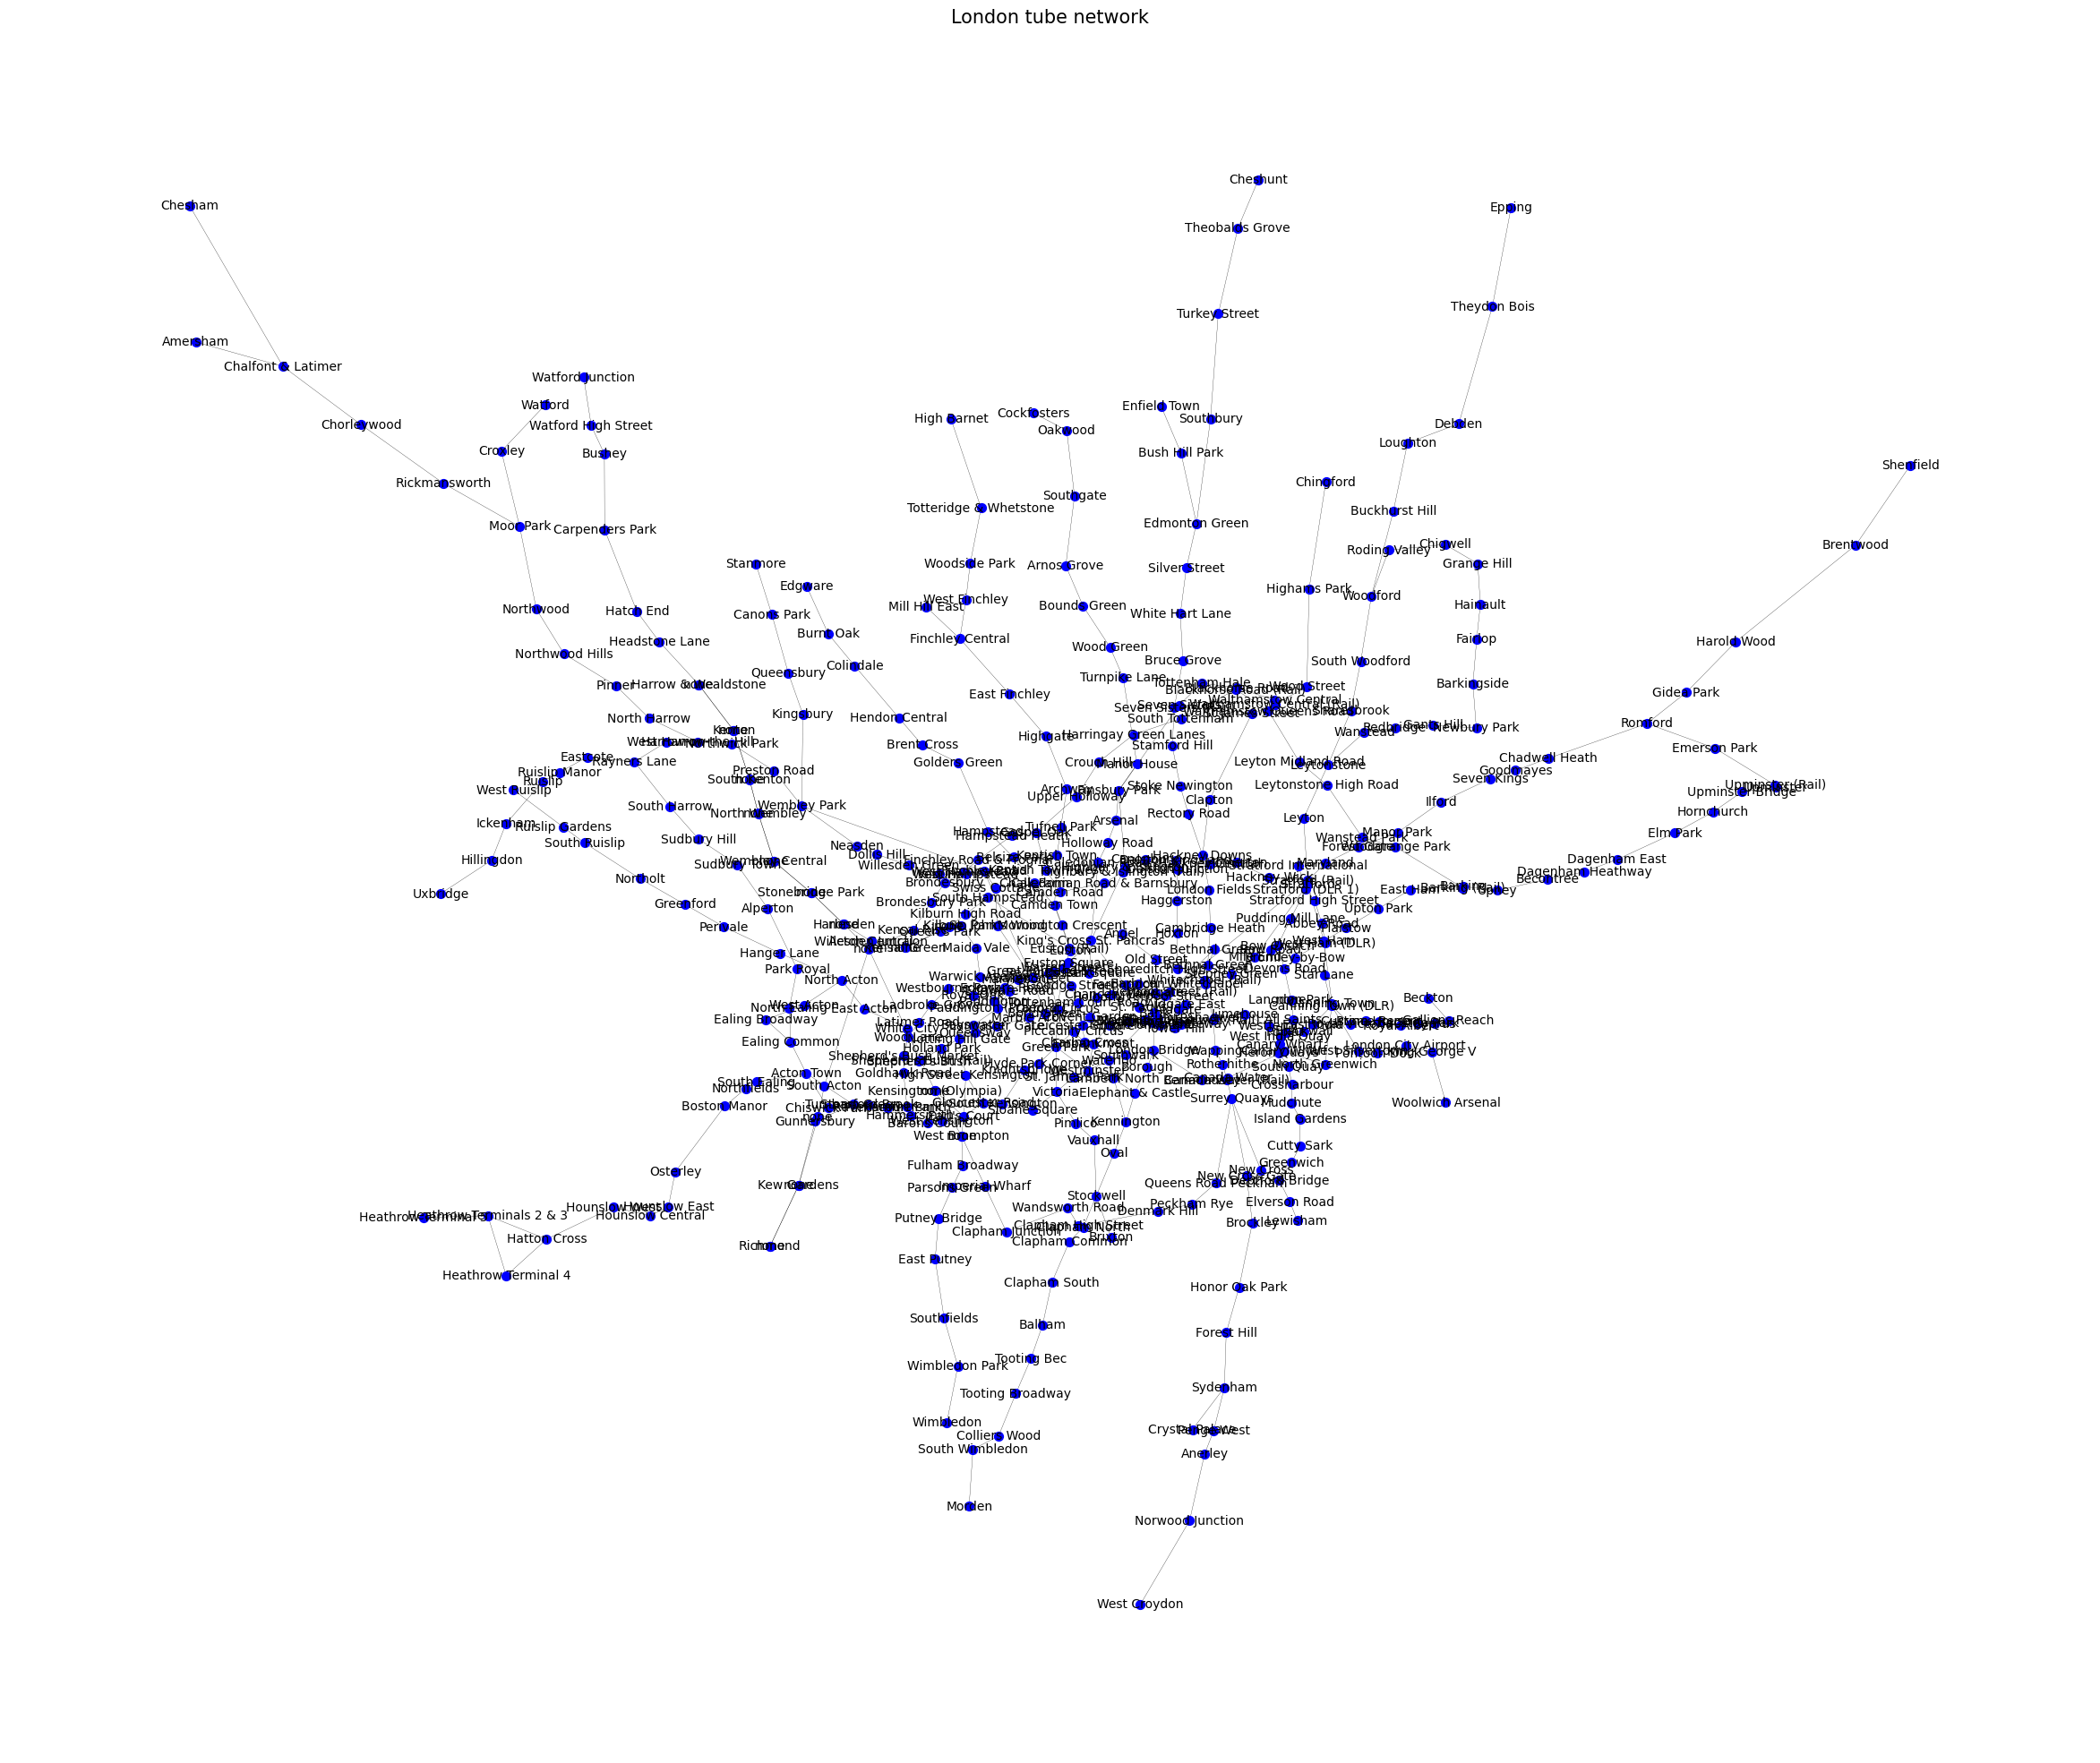

In [970]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(30,25))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()


In [971]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,length,station_2_,station_1_,line_id,name
0,910GCAMHTH,910GBTHNLGR,1076.082201,Bethnal Green,Cambridge Heath,LeaValleyLine1,London Overground
1,910GCAMHTH,910GLONFLDS,970.949720,London Fields,Cambridge Heath,LeaValleyLine2,London Overground
2,910GBTHNLGR,910GLIVST,1813.304143,Liverpool Street (Rail),Bethnal Green,LivStBeth,London Overground
3,910GBTHNLGR,940GZZLUBLG,481.514661,Bethnal Green,Bethnal Green,NaN,NaN
4,910GLONFLDS,910GHAKNYNM,917.502798,Hackney Downs,London Fields,LeaValleyLine3,London Overground
5,910GHAKNYNM,910GRCTRYRD,1178.231752,Rectory Road,Hackney Downs,LeaValleyLine4,London Overground
6,910GHAKNYNM,910GCLAPTON,1432.298268,Clapton,Hackney Downs,ChingfordSpur1,London Overground
7,910GRCTRYRD,910GSTKNWNG,775.442407,Stoke Newington,Rectory Road,LeaValleyLine5,London Overground
8,910GSTKNWNG,910GSTMFDHL,1200.722885,Stamford Hill,Stoke Newington,LeaValleyLine6,London Overground
9,910GSTMFDHL,910GSEVNSIS,1001.203674,Seven Sisters (Rail),Stamford Hill,LeaValleyLine7,London Overground


## 2.  Exploring the network:

In [972]:
# if want to know what is the maximum distance between stations
max_dist=max({weight for e1, e2, weight in G.edges(data='length')})
max_dist
# this distance in given in meters

7113.318903338077

In [973]:
# if want to know the edge connecting the stations farther away from each other
max(dict(G.edges).items(), key=lambda x: x[1]['length'])

(('940GZZLUWYP', '940GZZLUFYR'),
 {'length': 7113.318903338077,
  'name': 'Metropolitan',
  'line_id': 'MetJub7',
  'station_1_': 'Wembley Park',
  'station_2_': 'Finchley Road'})

In [974]:
#different ways to check the name of stations which are further away from each other: query the edges properties vs the nodes properties
%time furthest_stat = [(d['station_1_'],d['station_2_']) for  u, v, d in G.edges(data=True) if d['length'] == max_dist]
%time furthest_stat = [(G.nodes[u]['station_name'], G.nodes[v]['station_name']) for u, v, w in G.edges(data='length') if w==max_dist] 
furthest_stat

CPU times: user 237 μs, sys: 1 μs, total: 238 μs
Wall time: 239 μs
CPU times: user 245 μs, sys: 29 μs, total: 274 μs
Wall time: 454 μs


[('Wembley Park', 'Finchley Road')]

In [975]:
#if want to know to which stations Baker Street is directly connected to

Baker_Street = [(d['station_1_'],d['station_2_']) for  u,v,d in G.edges(data=True) if d['station_1_'] == 'Baker Street'or d['station_2_'] == 'Baker Street']
Baker_Street

[('Edgware Road', 'Baker Street'),
 ('Baker Street', 'Great Portland Street'),
 ('Baker Street', 'Bond Street'),
 ('Baker Street', "St. John's Wood"),
 ('Baker Street', 'Finchley Road'),
 ('Baker Street', 'Marylebone'),
 ('Baker Street', "Regent's Park")]

In [976]:
#if want to know to which stations Baker Street is directly connected to but we don't know if is written with the space 

Baker = [(d['station_1_'],d['station_2_']) for  u,v,d in G.edges(data=True) if "Baker" in d['station_1_'] or "Baker" in d['station_2_']]
Baker

[('Edgware Road', 'Baker Street'),
 ('Baker Street', 'Great Portland Street'),
 ('Baker Street', 'Bond Street'),
 ('Baker Street', "St. John's Wood"),
 ('Baker Street', 'Finchley Road'),
 ('Baker Street', 'Marylebone'),
 ('Baker Street', "Regent's Park")]

In [977]:
#if want to know the edges connecting Baker Street station:

Baker = [(u,v,d) for  u,v,d in G.edges(data=True) if "Baker" in d['station_1_'] or "Baker" in d['station_2_']]
Baker

[('940GZZLUERC',
  '940GZZLUBST',
  {'length': 926.5120326980218,
   'name': 'Hammersmith & City',
   'line_id': 'CircHamEdgware',
   'station_1_': 'Edgware Road',
   'station_2_': 'Baker Street'}),
 ('940GZZLUBST',
  '940GZZLUGPS',
  {'length': 821.2655270015941,
   'name': 'Circle',
   'line_id': '3LineNorth1',
   'station_1_': 'Baker Street',
   'station_2_': 'Great Portland Street'}),
 ('940GZZLUBST',
  '940GZZLUBND',
  {'length': 1667.851258389804,
   'name': 'Jubilee',
   'line_id': 'JubileeEastB',
   'station_1_': 'Baker Street',
   'station_2_': 'Bond Street'}),
 ('940GZZLUBST',
  '940GZZLUSJW',
  {'length': 2135.320836057866,
   'name': 'Jubilee',
   'line_id': 'JubileeEastC',
   'station_1_': 'Baker Street',
   'station_2_': "St. John's Wood"}),
 ('940GZZLUBST',
  '940GZZLUFYR',
  {'length': 3279.580795521362,
   'name': 'Metropolitan',
   'line_id': 'MetJub8',
   'station_1_': 'Baker Street',
   'station_2_': 'Finchley Road'}),
 ('940GZZLUBST',
  '940GZZLUMYB',
  {'length': 

In [978]:
# topological diameter of the network，number of edges in the longest path
topo_diameter = nx.diameter(G)
# weighted diameter of the network, sum of the length of the edges in the longest path
weighted_diameter = nx.diameter(G,weight='length')
print(topo_diameter,weighted_diameter)


47 76998.62487685519


In [979]:
# diameter of the network considering the distance between stations (weighted diameter)
nlen = {n:nx.single_source_dijkstra_path_length(G, n, weight='length') for n in G.nodes() }
e = nx.eccentricity(G,sp=nlen)
d = nx.diameter(G, e)
d

76998.62487685519

In [980]:
list(G.nodes(data = True))[0]

('910GCAMHTH',
 {'station_name': 'Cambridge Heath',
  'lines': 'London Overground',
  'coords': (534825.0140298002, 183290.813466997)})

In [981]:
#to check how many tubelines are there & how many stations are in each line
lines = [d['lines'].split(", ") for n, d in G.nodes(data=True)]
lines
flat_lines = [item for sublist in lines for item in sublist]
flat_lines

# count unique names in the list
from collections import Counter
lines_count = Counter(flat_lines)
lines_count

Counter({'London Overground': 111,
         'National Rail': 60,
         'District': 60,
         'Piccadilly': 53,
         'Northern': 50,
         'Central': 49,
         'DLR': 45,
         'Circle': 36,
         'Metropolitan': 36,
         'Hammersmith & City': 29,
         'Jubilee': 27,
         'Bakerloo': 25,
         'Crossrail': 18,
         'Victoria': 16,
         'lines': 16,
         'TfL Rail': 14,
         'Crossrail 2': 11,
         'East London': 8,
         'Waterloo & City': 2})

## 3.  Centrality measures

#### Degree Centrality on nodes:

In [1008]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [1009]:
#retrieve the degree centrality of the node
G.nodes['940GZZLUBST']['degree']

0.016018306636155607

In [1010]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,station_name,degree
940GZZLUKSX,King's Cross St. Pancras,0.016018
940GZZLUBST,Baker Street,0.016018
940GZZLUOXC,Oxford Circus,0.013730
940GZZLUGPK,Green Park,0.013730
940GZZLUBNK,Bank,0.013730
940GZZLUECT,Earl's Court,0.013730
940GZZLUWLO,Waterloo,0.013730
940GZZLUTNG,Turnham Green,0.011442
940GZZDLCGT,Canning Town (DLR),0.011442
940GZZLULVT,Liverpool Street,0.011442


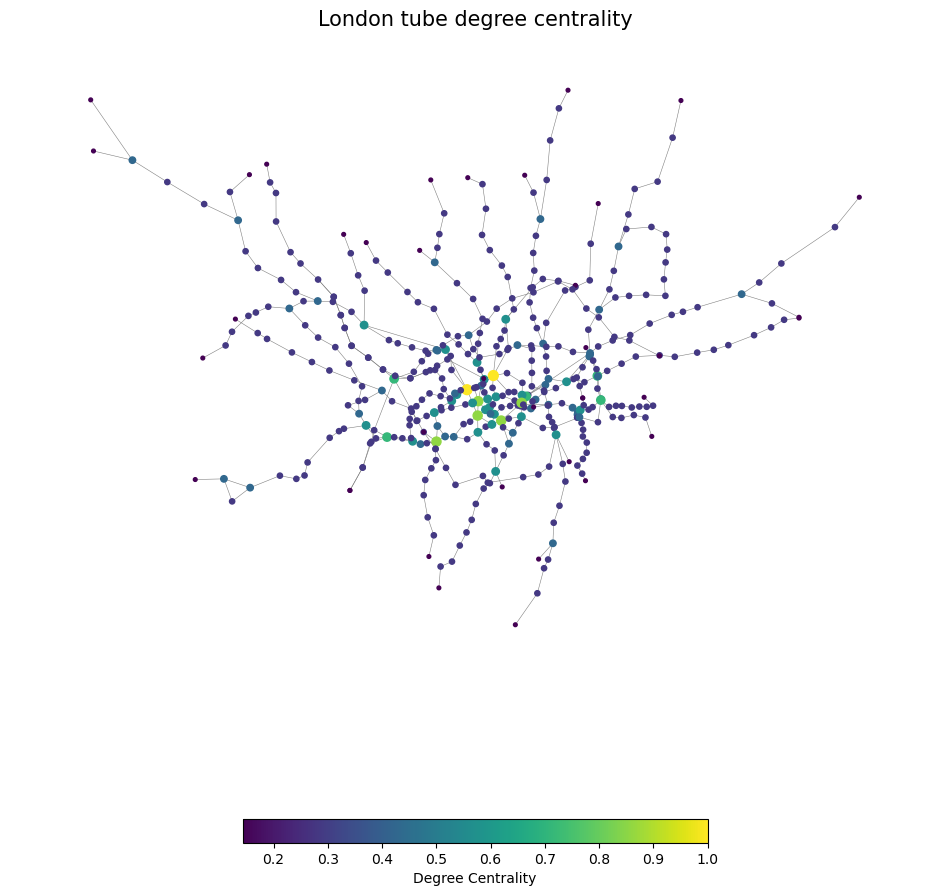

In [1011]:
# Lets set colour and size of nodes according to degree centrality values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

#### Betweenness Centrality on nodes:

In [1012]:
### Weighted betweenness centrality:
# Let us compute the betweenness centrality for the network, considering the distance between stations:

bet_london_w=nx.betweenness_centrality(G,weight='length',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

In [1013]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_w
940GZZLUBST,Baker Street,36734.0
940GZZLUFYR,Finchley Road,29786.0
940GZZLULVT,Liverpool Street,25752.0
910GWHMDSTD,West Hampstead,25747.0
940GZZLUWHP,West Hampstead,25686.0
940GZZLUKSX,King's Cross St. Pancras,24628.0
940GZZLUBNK,Bank,21087.0
940GZZLUMED,Mile End,17759.0
940GZZLUOXC,Oxford Circus,17317.0
910GBTHNLGR,Bethnal Green,17211.0


In [1014]:
# invert the lengths and set as an attribute of the edges
nx.set_edge_attributes(G, {(u, v): 1/d['length'] for u, v, d in G.edges(data=True)}, 'inverted_length')

bet_london_w=nx.betweenness_centrality(G,weight='length',normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

bet_london_w=nx.betweenness_centrality(G,weight='inverted_length',normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w_inv')

df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))
df['betweenness_w_inv'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w_inv'))

df_sorted = df.sort_values(["betweenness_w_inv"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_w,betweenness_w_inv
940GZZLUBNK,Bank,21087.0,37917.0
940GZZLUBLG,Bethnal Green,16402.0,35281.0
940GZZLUGPK,Green Park,6414.0,34570.0
940GZZLUWLO,Waterloo,9738.0,31053.0
940GZZLULVT,Liverpool Street,25752.0,30609.0
940GZZLUBST,Baker Street,36734.0,28657.0
910GBTHNLGR,Bethnal Green,17211.0,27963.0
940GZZLUWSM,Westminster,7366.0,27543.0
940GZZLUFYR,Finchley Road,29786.0,23878.0
910GSTFD,Stratford (Rail),9881.0,21357.0


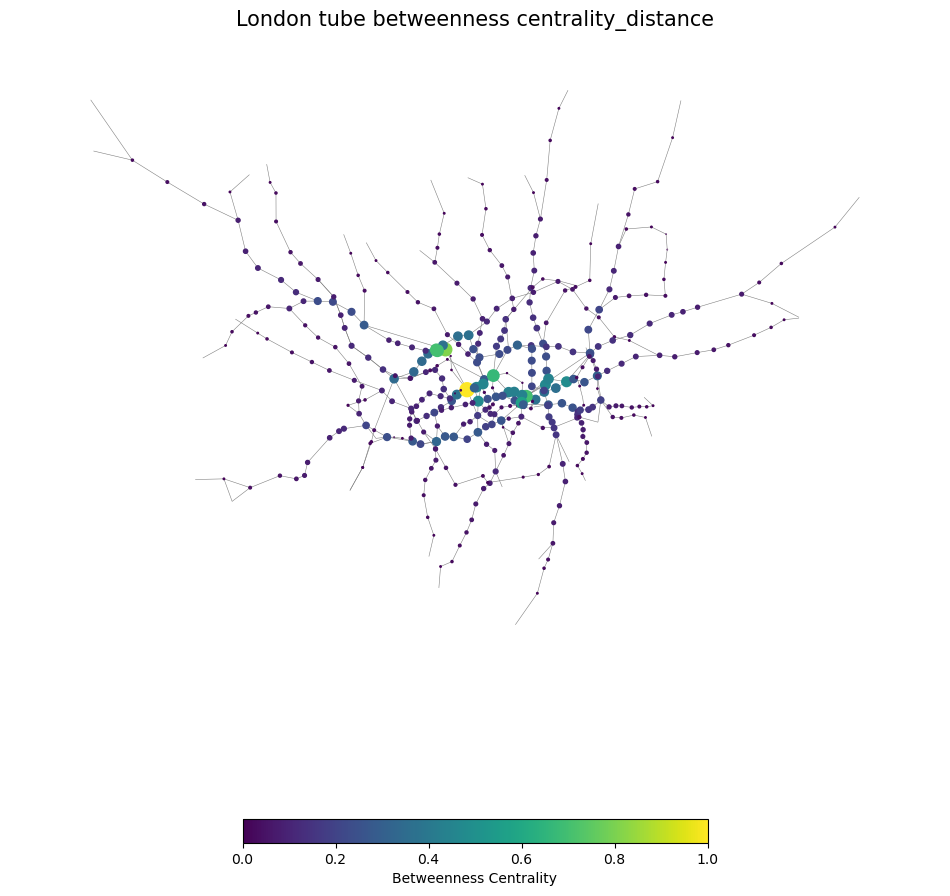

In [1015]:
# Lets set colour and size of nodes according to betweenness values（weighted by the distance）
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality_distance",fontsize=15)
plt.show()

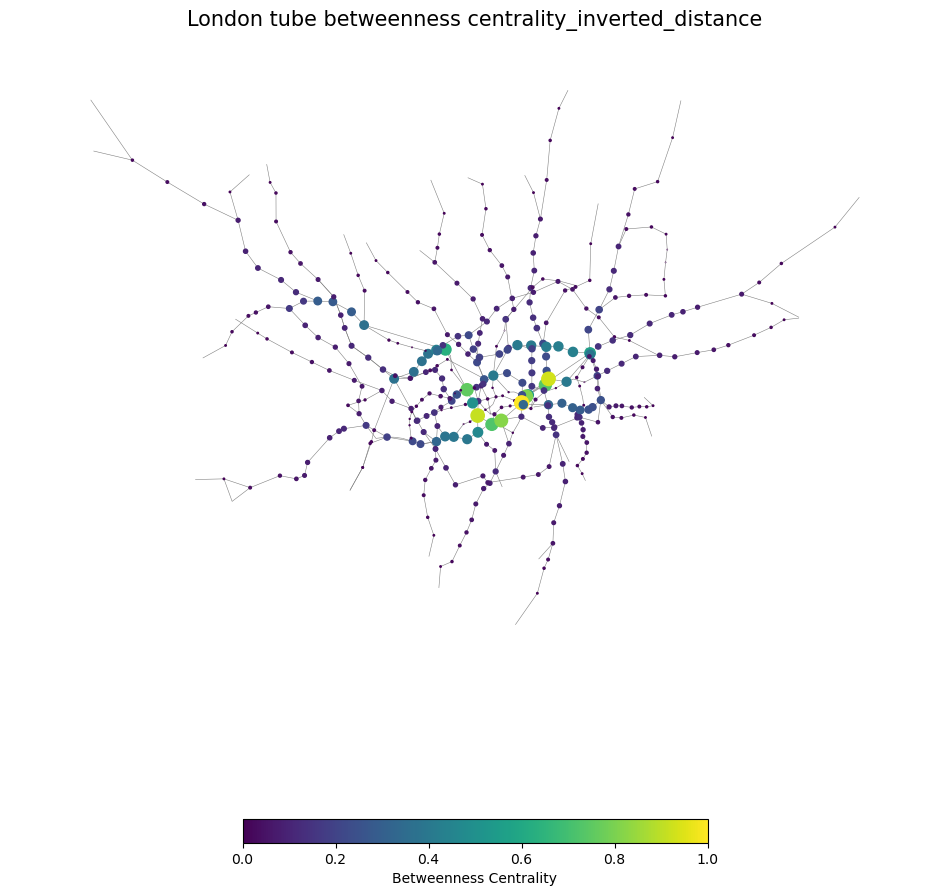

In [1016]:
# Lets set colour and size of nodes according to betweenness values（weighted by the inverse of the length）
betweenness_w_values=[(i[1]['betweenness_w_inv']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w_inv']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w_inv']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality_inverted_distance",fontsize=15)
plt.show()

In [1017]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,station_name,betweenness_t
940GZZLUBST,Baker Street,36297.775794
940GZZLUBLG,Bethnal Green,33670.108333
940GZZLUFYR,Finchley Road,32064.800397
940GZZLUBNK,Bank,30443.441667
940GZZLUGPK,Green Park,30442.438095
940GZZLUWLO,Waterloo,30219.900000
940GZZLULVT,Liverpool Street,29820.741667
940GZZLUWSM,Westminster,27623.541667
940GZZLUBND,Bond Street,24635.653175
910GWHMDSTD,West Hampstead,22536.658333


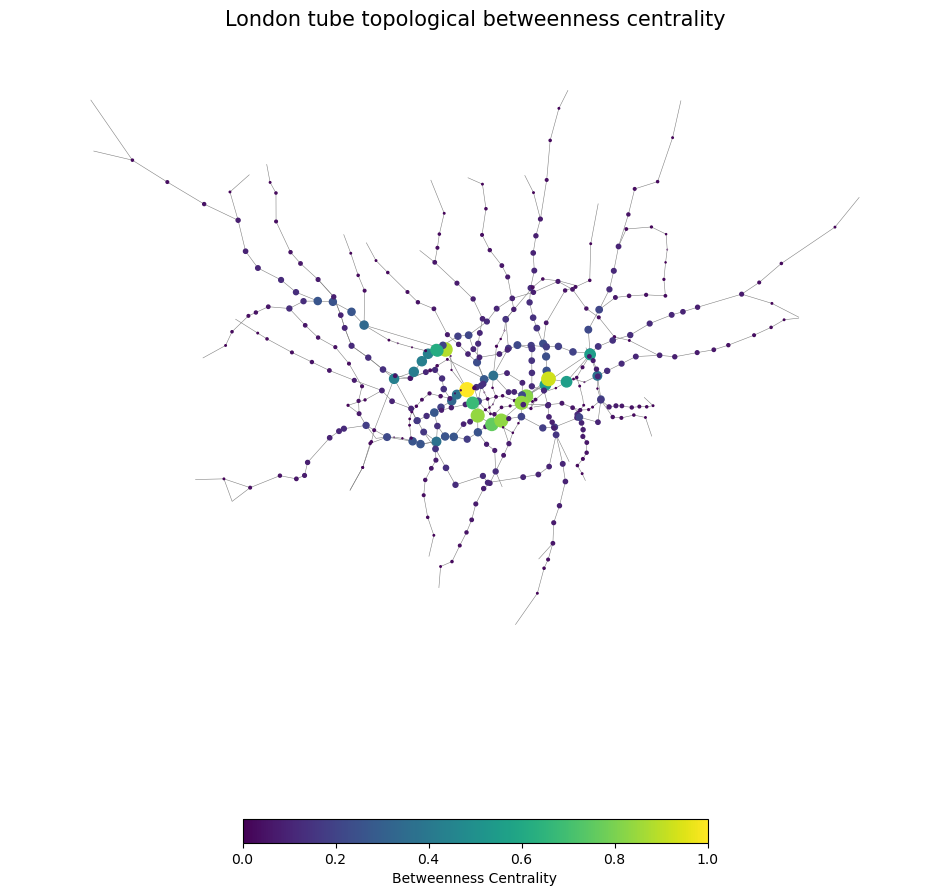

In [1018]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

#### Betweenness Centrality on the edges:

In [1019]:
#Let us compute the betweenness centrality for the network, but this time lets do it in the edges!
bet_london_e=nx.edge_betweenness_centrality(G, normalized=False, weight='length')
# We can add these values to the edges attributes:
nx.set_edge_attributes(G,bet_london_e,'betweenness_e')

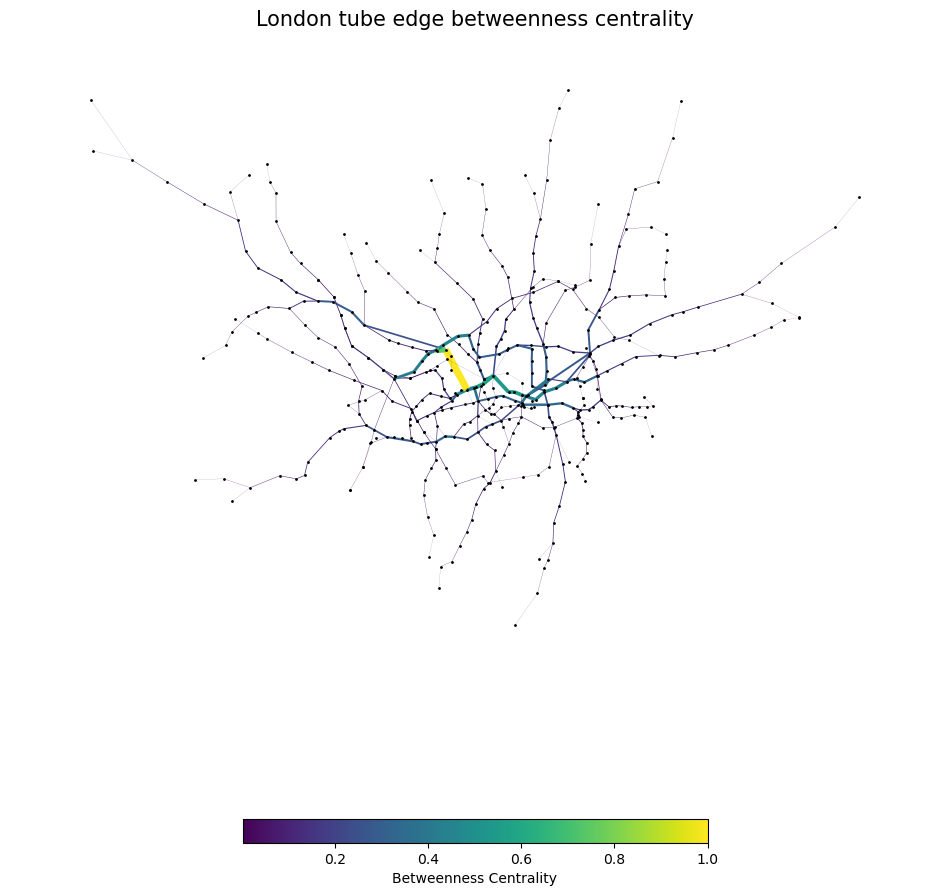

In [1020]:
# Lets set color and width of edges according to betweenness values
betweenness_e_values=[(i[2]['betweenness_e']) for i in G.edges(data=True)]

bet_e_color=[(i[2]['betweenness_e']/max(betweenness_e_values)) for i in G.edges(data=True)]
bet_e_width=[(i[2]['betweenness_e']/max(betweenness_e_values)*5) for i in G.edges(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

#pos=nx.spring_layout(X)
edg=nx.draw_networkx_edges(G, pos,edge_color=bet_e_color, width=bet_e_width)

nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= 'black',
        node_size= 1)

plt.colorbar(edg,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube edge betweenness centrality",fontsize=15)
plt.show()

#### Closeness Centrality:

In [1021]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(G, distance='length')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))

df_sorted = df.sort_values(["closeness_w"], ascending=False)
df_sorted[0:10]

,station_name,closeness_w
940GZZLUOXC,Oxford Circus,0.000073
940GZZLUTCR,Tottenham Court Road,0.000073
940GZZLUBST,Baker Street,0.000072
940GZZLUHBN,Holborn,0.000072
940GZZLUBND,Bond Street,0.000072
940GZZLURGP,Regent's Park,0.000072
940GZZLUPCC,Piccadilly Circus,0.000072
940GZZLUKSX,King's Cross St. Pancras,0.000072
940GZZLULSQ,Leicester Square,0.000071
940GZZLUGPS,Great Portland Street,0.000071


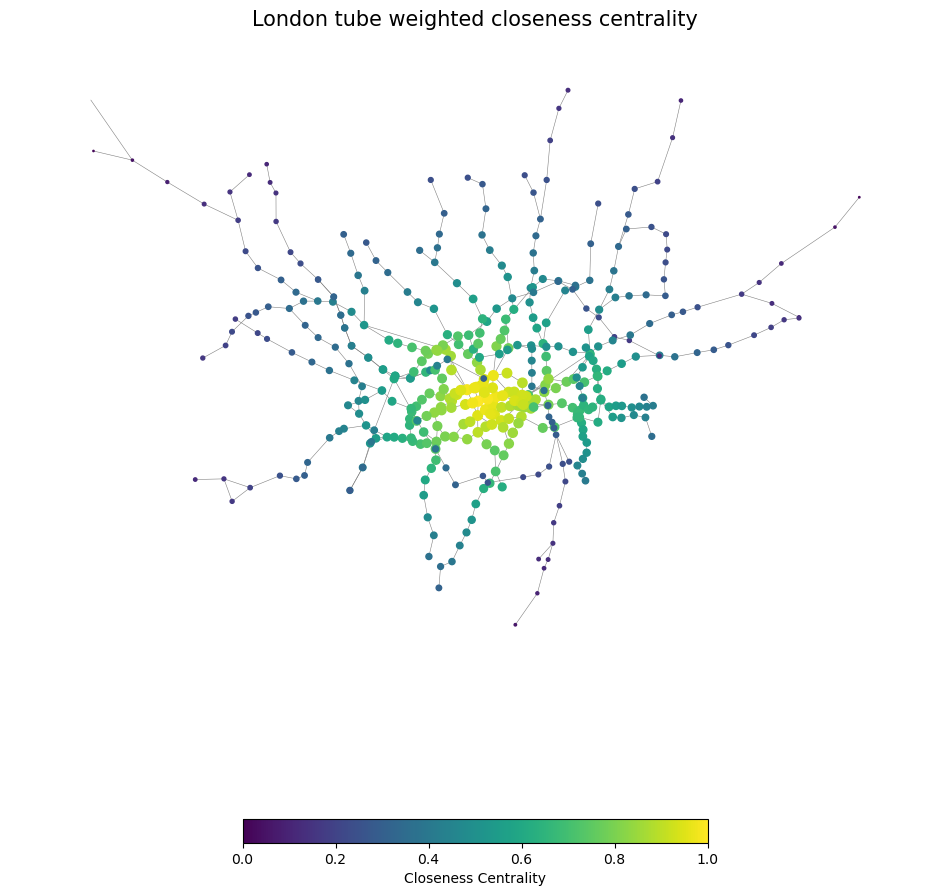

In [1022]:
# Lets set color and width of nodes according to the closeness values

clos_w_val=[(i[1]['closeness_w']) for i in G.nodes(data=True)]

closs_w_color=[(i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val)) for i in G.nodes(data=True)]
closs_w_size=[((i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_w_color,
        node_size= closs_w_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted closeness centrality",fontsize=15)
plt.show()

In [1023]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,station_name,closeness_t
940GZZLUGPK,Green Park,0.094897
940GZZLUBND,Bond Street,0.093737
940GZZLUWSM,Westminster,0.093197
940GZZLUBST,Baker Street,0.092900
940GZZLUWLO,Waterloo,0.092389
940GZZLUBNK,Bank,0.092000
940GZZLUOXC,Oxford Circus,0.091614
940GZZLULVT,Liverpool Street,0.090010
940GZZLURGP,Regent's Park,0.089275
940GZZLUFYR,Finchley Road,0.089165


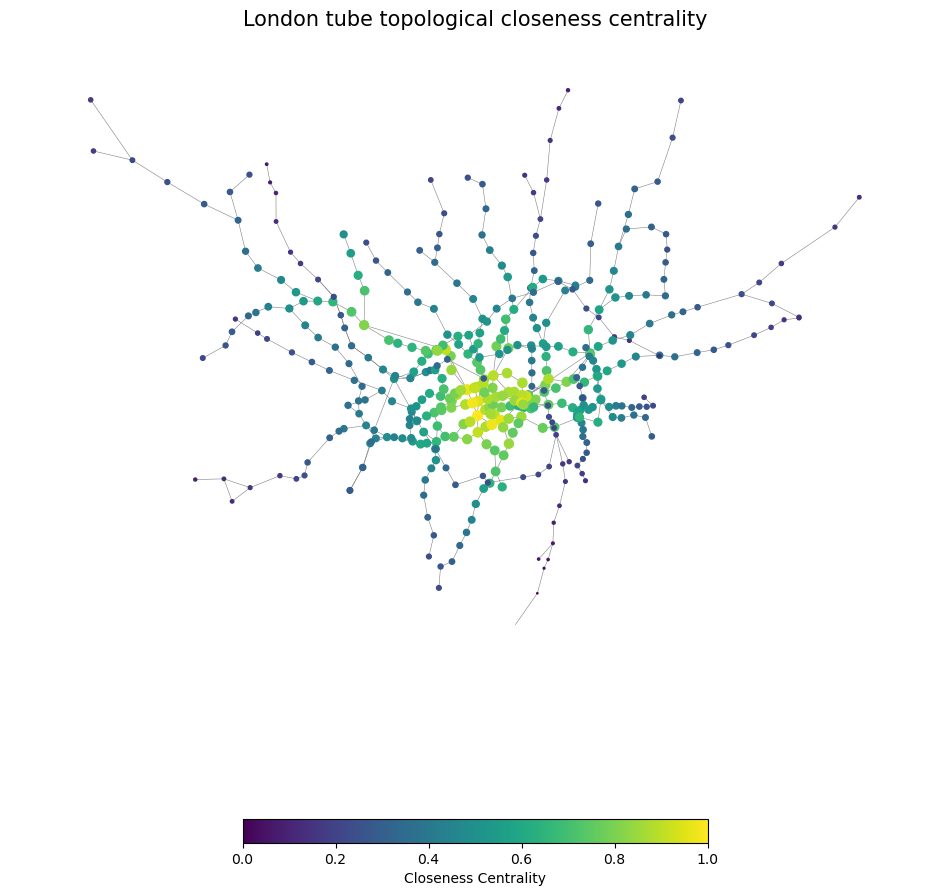

In [1024]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

See this link for more centralities and their function in python:
https://networkx.org/documentation/networkx-1.10/reference/algorithms.centrality.html

In [1025]:
# number of connected components
nx.number_connected_components(G)

1

## 4.Explore the Influence of nodes:

Remove the node with the highest value according to one of the selected centralities in each. 
Then Critically think about the impact of the removal of nodes in the network according to the different centralities.

You may want to use some of the following codes: 

In [832]:
G2=G.copy()

In [833]:
#To remove nodes: 
#If we want to remove the node with the max value of betweenness centrality:

maxbet=[n for n in G2.nodes() if G2.nodes[n]['betweenness_t'] == max(betweenness_t_values)]
maxbet

['940GZZLUBST']

In [834]:
# To check that node:
G2.nodes[(", ".join(maxbet))]['station_name']

#G2.nodes['940GZZLUBST']['station_name']

'Baker Street'

In [835]:
# Number of existing nodes:
l1=list(G2.nodes)
len(l1)

438

In [836]:
#To remove nodes:
# In this case we are removing the node with the maximum betweenness centrality value
G2.remove_nodes_from(maxbet)

In [837]:
# number of nodes after the removal
l2=list(G2.nodes)
len(l2)

437

In [838]:
# to check which is the one missing:
rem_nodes=list(set(l1) - set(l2))
rem_nodes

['940GZZLUBST']

In [839]:
# To remove  10 highest values:
# List of nodes:
values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_ten=[e for e,v in values_sorted[:10]]
sorted_ten 

['940GZZLUBST',
 '940GZZLUBLG',
 '940GZZLUFYR',
 '940GZZLUBNK',
 '940GZZLUGPK',
 '940GZZLUWLO',
 '940GZZLULVT',
 '940GZZLUWSM',
 '940GZZLUBND',
 '910GWHMDSTD']

In [848]:
#Remove nodes:
G2.remove_nodes_from(sorted_ten)

In [849]:
# number of nodes after removal:
l3=list(G2.nodes)
len(l3)

428

In [842]:
# to check which is the one missing:
list(set(l2) - set(l3))

#Note that node '940GZZLUBST' is not in this list because it was alredy removed before, and we didnt create another copy for graph G

['940GZZLUBNK',
 '940GZZLUGPK',
 '940GZZLUBND',
 '940GZZLUBLG',
 '910GWHMDSTD',
 '940GZZLUWLO',
 '940GZZLULVT',
 '940GZZLUWSM',
 '940GZZLUFYR']

In [850]:
# Has the graph one component?
print(nx.is_connected(G2))

False


In [851]:
# number of connected components
nx.number_connected_components(G2)

3

In [852]:
# To comput the size ( number of node) of each component
Subg = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg]

[121, 305, 2]

In [889]:

# Get the list of components:
components = nx.connected_components(G2)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G2.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

305

In [855]:
# You can compute the diameter of this new graph 
diameter = nx.diameter(Largest_subgraph)
diameter 

69

# Quiz

### Question 1:

If the construction cost is only related to the number of stations, which line is the most expensive?

### Question 2:

Alternatively, assuming that the construction cost is proportional to the distance between stations, which underground tube line has the highest construction cost? 



### Question 3: 

What is the shortest distance between the station that serves as the key topological intermediary in the network and the most inaccessible station that takes the longest distance to reach from any other station(rounded to km)?

### Question 4: 

How does the network's diameter (in terms of the number of edges) change if:1. The key topological intermediary is removed?2.The station with the highest closeness centrality is removed?

### Question5:

What is the difference in the size of the largest component when removing the top 10 stations with the highest topological betweenness centrality compared to removing the 10 most accessible stations with the highest distance-weighted closeness centrality?